# All in One
Imagine you are a cybersecurity analyst working for a company that monitors network traffic to detect malicious activity. Your goal is to build an AI model that can differentiate between normal and malicious traffic to enhance the company's security measures.


# **Introduction**

# AI and Cybersecurity
This Google Colab notebook provides an introduction to AI concepts applied in cybersecurity. We will cover basic concepts and implement simple examples to understand how AI can enhance cybersecurity measures.


# **Setup**
First, let's install the necessary libraries.<br>
!pip install numpy pandas scikit-learn matplotlib seaborn: Installs the necessary libraries for numerical operations (numpy), data manipulation (pandas), machine learning (scikit-learn), and visualization (matplotlib and seaborn).<br>
import ...: Imports the installed libraries into the current environment, providing access to their functionalities.<br>





In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Data Preparation**
* Let's start with a simple dataset to work on. For this example, we'll use a dataset of network traffic data.

* We'll use the KDD Cup 1999 dataset, a well-known dataset for network intrusion detection.

In [2]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset

column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
                "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
                "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
                "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                "dst_host_srv_rerror_rate", "label"]

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kddcup.data_10_percent.gz', names=column_names)


# Show the first few rows of the dataset
dataset


Mounted at /content/drive


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


# **Data Preprocessing**
We need to preprocess the data to prepare it for training.



In [3]:
# Encode categorical features. Encodes categorical features (protocol_type, service, flag)
# into numerical codes for compatibility with machine learning algorithms.
dataset['protocol_type'] = dataset['protocol_type'].astype('category').cat.codes
dataset['service'] = dataset['service'].astype('category').cat.codes
dataset['flag'] = dataset['flag'].astype('category').cat.codes

# Convert the label to binary. Converts the target variable (label) to binary values (0 for normal, 1 for malicious).
dataset['label'] = dataset['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# Split the data into features and target. Separates the features (X) from the target variable (y)
X = dataset.drop('label', axis=1)
y = dataset['label']

# Split the data into training and testing sets. Splits the data into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data. Standardizes the feature values to have zero mean and unit variance, improving model performance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Building the AI Model**
We'll use a simple logistic regression model to classify the network traffic.

In [4]:
# Train a logistic regression model. Creates a logistic regression model and trains it on the training data.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions. Uses the trained model to predict labels for the test data.
y_pred = model.predict(X_test)

# Evaluate the model. Evaluates the model's performance using accuracy score and classification report.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9971661353170386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19353
           1       1.00      1.00      1.00     79452

    accuracy                           1.00     98805
   macro avg       0.99      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805



# **Visualizing Results**
Visualizing the results can help in understanding the performance of the model.

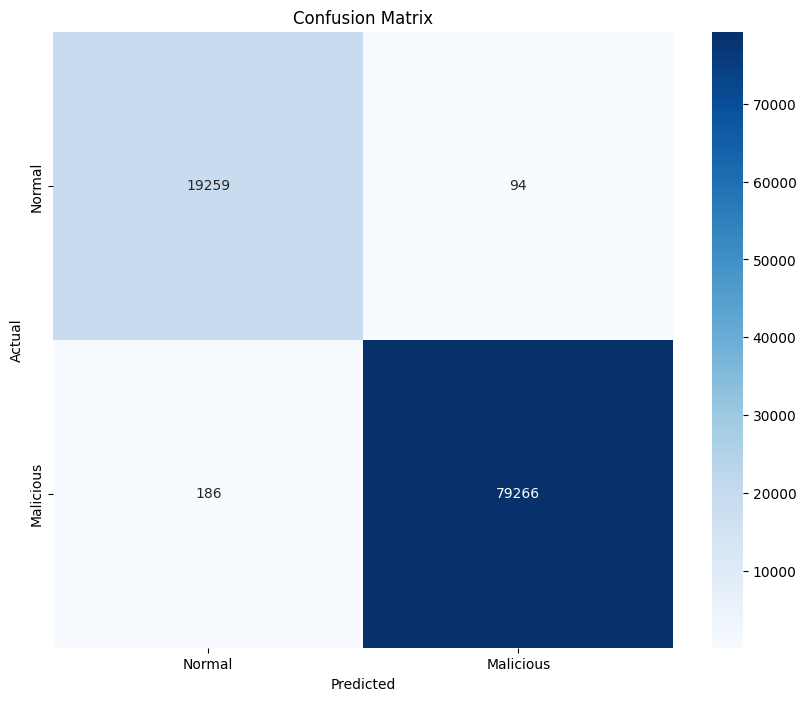

In [5]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Saving and Loading the Model**

In [6]:
# Imports the joblib library for saving and loading models.
import joblib

# Save the model to a file. Saves the trained model to a file for later use.
filename = '/content/drive/My Drive/Colab Notebooks/logistic_regression_model.sav'
joblib.dump(model, filename)

['/content/drive/My Drive/Colab Notebooks/logistic_regression_model.sav']

In [7]:
# Load the model from the file. Loads the saved model from the file.
loaded_model = joblib.load(filename)

# **Testing the Loaded Model**


In [8]:
# Assuming 'X_test' and 'y_test' are your sample test data.
# Indicates that X_test and y_test are assumed to be available for testing the loaded model.
# Uses the loaded model to predict labels for the test data.
y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model.
# Calculates the accuracy of the loaded model on the test data.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of loaded model: {accuracy}')

Accuracy of loaded model: 0.9971661353170386


# **Testing on a Sample from the Original Dataset**

In [9]:
import numpy as np

# Assuming 'dataset' is your original KDD Cup 1999 DataFrame

# Extract a small portion (e.g., 1%) as a sample test set
# Creates a small sample test set from the original dataset and preprocesses it similarly to the training data.
sample_test_dataset = dataset.sample(frac=0.01, random_state=42)

# Separate features and labels for the sample test set
X_test_sample = sample_test_dataset.drop('label', axis=1)
y_test_sample = sample_test_dataset['label']

# Preprocess the sample test features (same way as training data)
X_test_sample['protocol_type'] = X_test_sample['protocol_type'].astype('category').cat.codes
X_test_sample['service'] = X_test_sample['service'].astype('category').cat.codes
X_test_sample['flag'] = X_test_sample['flag'].astype('category').cat.codes
X_test_sample = scaler.transform(X_test_sample) # Use the same scaler as before

print(f'************* Sample for Test ***************')
print(X_test_sample)
print(f'*********** Accuracy *************')

# Load the model (assuming you have already saved it). Loads the saved model again.
loaded_model = joblib.load('/content/drive/My Drive/Colab Notebooks/logistic_regression_model.sav')

# Make predictions on the sample test data(Predicts labels for the sample test data)
y_pred_sample = loaded_model.predict(X_test_sample)

# Evaluate the model on the sample data
accuracy_sample = accuracy_score(y_test_sample, y_pred_sample)
print(f'Accuracy on KDD Cup 1999 sample test data: {accuracy_sample}')

************* Sample for Test ***************
[[-0.06794743 -0.81260096 -0.76975474 ... -0.46383097 -0.25184492
  -0.24917766]
 [-0.06794743 -0.81260096 -0.76975474 ... -0.46383097 -0.25184492
  -0.24917766]
 [-0.06794743 -0.81260096 -0.76975474 ... -0.46383097 -0.25184492
  -0.24917766]
 ...
 [-0.06794743  0.92397081 -0.40061191 ... -0.46383097 -0.25184492
  -0.24917766]
 [-0.06794743 -0.81260096 -0.76975474 ... -0.46383097 -0.25184492
  -0.24917766]
 [-0.06794743 -0.81260096 -0.76975474 ... -0.46383097 -0.25184492
  -0.24917766]]
*********** Accuracy *************
Accuracy on KDD Cup 1999 sample test data: 0.9967611336032388


# **Conclusion**

In this notebook, we simulated a cybersecurity scenario where we used AI to detect malicious network traffic. We preprocessed the data, trained a logistic regression model, evaluated its performance, and visualized the results. This project provided a hands-on experience in applying machine learning to a real-world cybersecurity problem.

